<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Pollution_dynamics03_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

In [58]:
import seaborn as sns

In [59]:
#connect the data to dataframe
path ='/content/drive/MyDrive/Colab Notebooks/Data for JER/activity2003_2020.csv'
df = pd.read_csv(path, parse_dates=['Date'])
df.head()

,Date,Conc
0,2003-01-01,22.0
1,2003-01-02,18.0
2,2003-01-03,22.0
3,2003-01-04,46.0
4,2003-01-05,23.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6487 entries, 0 to 6486
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6487 non-null   datetime64[ns]
 1   Conc    6404 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 101.5 KB


In [61]:
df['Week'] = df.Date.dt.isocalendar().week
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df

,Date,Conc,Week,Month,Year
0,2003-01-01,22.0,1,1,2003
1,2003-01-02,18.0,1,1,2003
2,2003-01-03,22.0,1,1,2003
3,2003-01-04,46.0,1,1,2003
4,2003-01-05,23.0,1,1,2003
...,...,...,...,...,...
6482,2020-12-27,12.0,52,12,2020
6483,2020-12-28,17.0,53,12,2020
6484,2020-12-29,10.0,53,12,2020
6485,2020-12-30,13.0,53,12,2020


In [62]:
#Adding dictionary for manipulating with month numbers
m_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [63]:
df1 = df.resample('M', on = 'Date').mean()
df1.dropna(inplace = True)
df1.reset_index('Date', inplace=True)
df1['Month'] = df1.Date.dt.month
df1['Mon'] = df1['Month'].replace(m_dict)
df1['Week'] = df1.Date.dt.isocalendar().week
df1['Year'] = df1.Date.dt.year
df1['season'] = np.where(df1.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
df1

,Date,Conc,Week,Month,Year,Mon,season
0,2003-01-31,19.200000,5,1,2003,Jan,win
1,2003-02-28,12.592593,9,2,2003,Feb,win
2,2003-03-31,17.333333,14,3,2003,Mar,win
3,2003-04-30,15.071429,18,4,2003,Apr,sum
4,2003-05-31,18.275862,22,5,2003,May,sum
...,...,...,...,...,...,...,...
208,2020-08-31,16.967742,36,8,2020,Aug,sum
209,2020-09-30,19.200000,40,9,2020,Sep,sum
210,2020-10-31,21.612903,44,10,2020,Oct,win
211,2020-11-30,22.000000,49,11,2020,Nov,win


In [64]:
df1.drop('Month', axis=1, inplace=True)
df1

,Date,Conc,Week,Year,Mon,season
0,2003-01-31,19.200000,5,2003,Jan,win
1,2003-02-28,12.592593,9,2003,Feb,win
2,2003-03-31,17.333333,14,2003,Mar,win
3,2003-04-30,15.071429,18,2003,Apr,sum
4,2003-05-31,18.275862,22,2003,May,sum
...,...,...,...,...,...,...
208,2020-08-31,16.967742,36,2020,Aug,sum
209,2020-09-30,19.200000,40,2020,Sep,sum
210,2020-10-31,21.612903,44,2020,Oct,win
211,2020-11-30,22.000000,49,2020,Nov,win


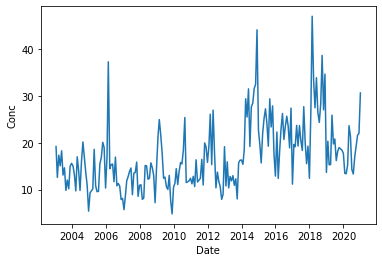

In [65]:
sns.lineplot(data = df1, x = 'Date', y = 'Conc')

In [238]:
df2 = df[df['Conc'] > 47]
df2.dropna(inplace = True)
df2['Mon'] = df2['Month'].replace(m_dict)
df2['season'] = np.where(df2.Mon.isin(['Apr','May','Jun','Jul','Aug','Sep']), 'sum', 'win')
df2.drop('Month',1, inplace=True)
df_sum = df2[df2['season'] == 'sum']
df_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Date,Conc,Week,Year,Rank,Rank_Pct,Mon,season
5524,2018-05-14,48.0,20,2018,6219.5,0.971190,May,sum
4152,2014-08-11,48.0,33,2014,6219.5,0.971190,Aug,sum
5177,2017-06-01,48.0,22,2017,6219.5,0.971190,Jun,sum
6256,2020-05-15,48.0,20,2020,6219.5,0.971190,May,sum
4763,2016-04-13,48.0,15,2016,6219.5,0.971190,Apr,sum
...,...,...,...,...,...,...,...,...
5643,2018-09-10,85.0,37,2018,6389.5,0.997736,Sep,sum
6223,2020-04-12,86.0,15,2020,6391.0,0.997970,Apr,sum
6228,2020-04-17,92.0,16,2020,6394.5,0.998517,Apr,sum
6227,2020-04-16,92.0,16,2020,6394.5,0.998517,Apr,sum


In [240]:
df_sum.index[68]

4412

In [67]:
df_win = df2[df2['season'] == 'win']
df_win

,Date,Conc,Week,Year,Mon,season
7,2003-01-08,63.0,2,2003,Jan,win
72,2003-03-14,55.0,11,2003,Mar,win
389,2004-01-25,73.0,4,2004,Jan,win
948,2005-10-03,71.0,40,2005,Oct,win
981,2005-11-05,65.0,44,2005,Nov,win
...,...,...,...,...,...,...
6460,2020-12-05,69.0,49,2020,Dec,win
6465,2020-12-10,62.0,50,2020,Dec,win
6467,2020-12-12,51.0,50,2020,Dec,win
6468,2020-12-13,56.0,50,2020,Dec,win


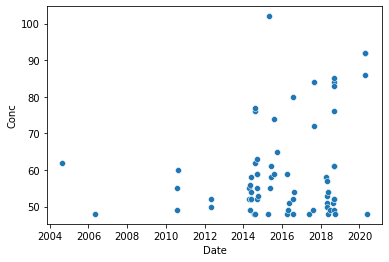

In [68]:
sns.scatterplot(x='Date', y = 'Conc', data=df_sum)

In [184]:
df2.tail(50)

,Date,Conc,Week,Year,Mon,season
5497,2018-04-17,58.0,16,2018,Apr,sum
5511,2018-05-01,53.0,18,2018,May,sum
5512,2018-05-02,51.0,18,2018,May,sum
5514,2018-05-04,57.0,18,2018,May,sum
5515,2018-05-05,50.0,18,2018,May,sum
5521,2018-05-11,54.0,19,2018,May,sum
5524,2018-05-14,48.0,20,2018,May,sum
5568,2018-06-27,49.0,26,2018,Jun,sum
5630,2018-08-28,51.0,35,2018,Aug,sum
5634,2018-09-01,61.0,35,2018,Sep,sum


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(2015-04-28 00:00:00, 105.0, '2015-04-28\n Fire in CEZ')

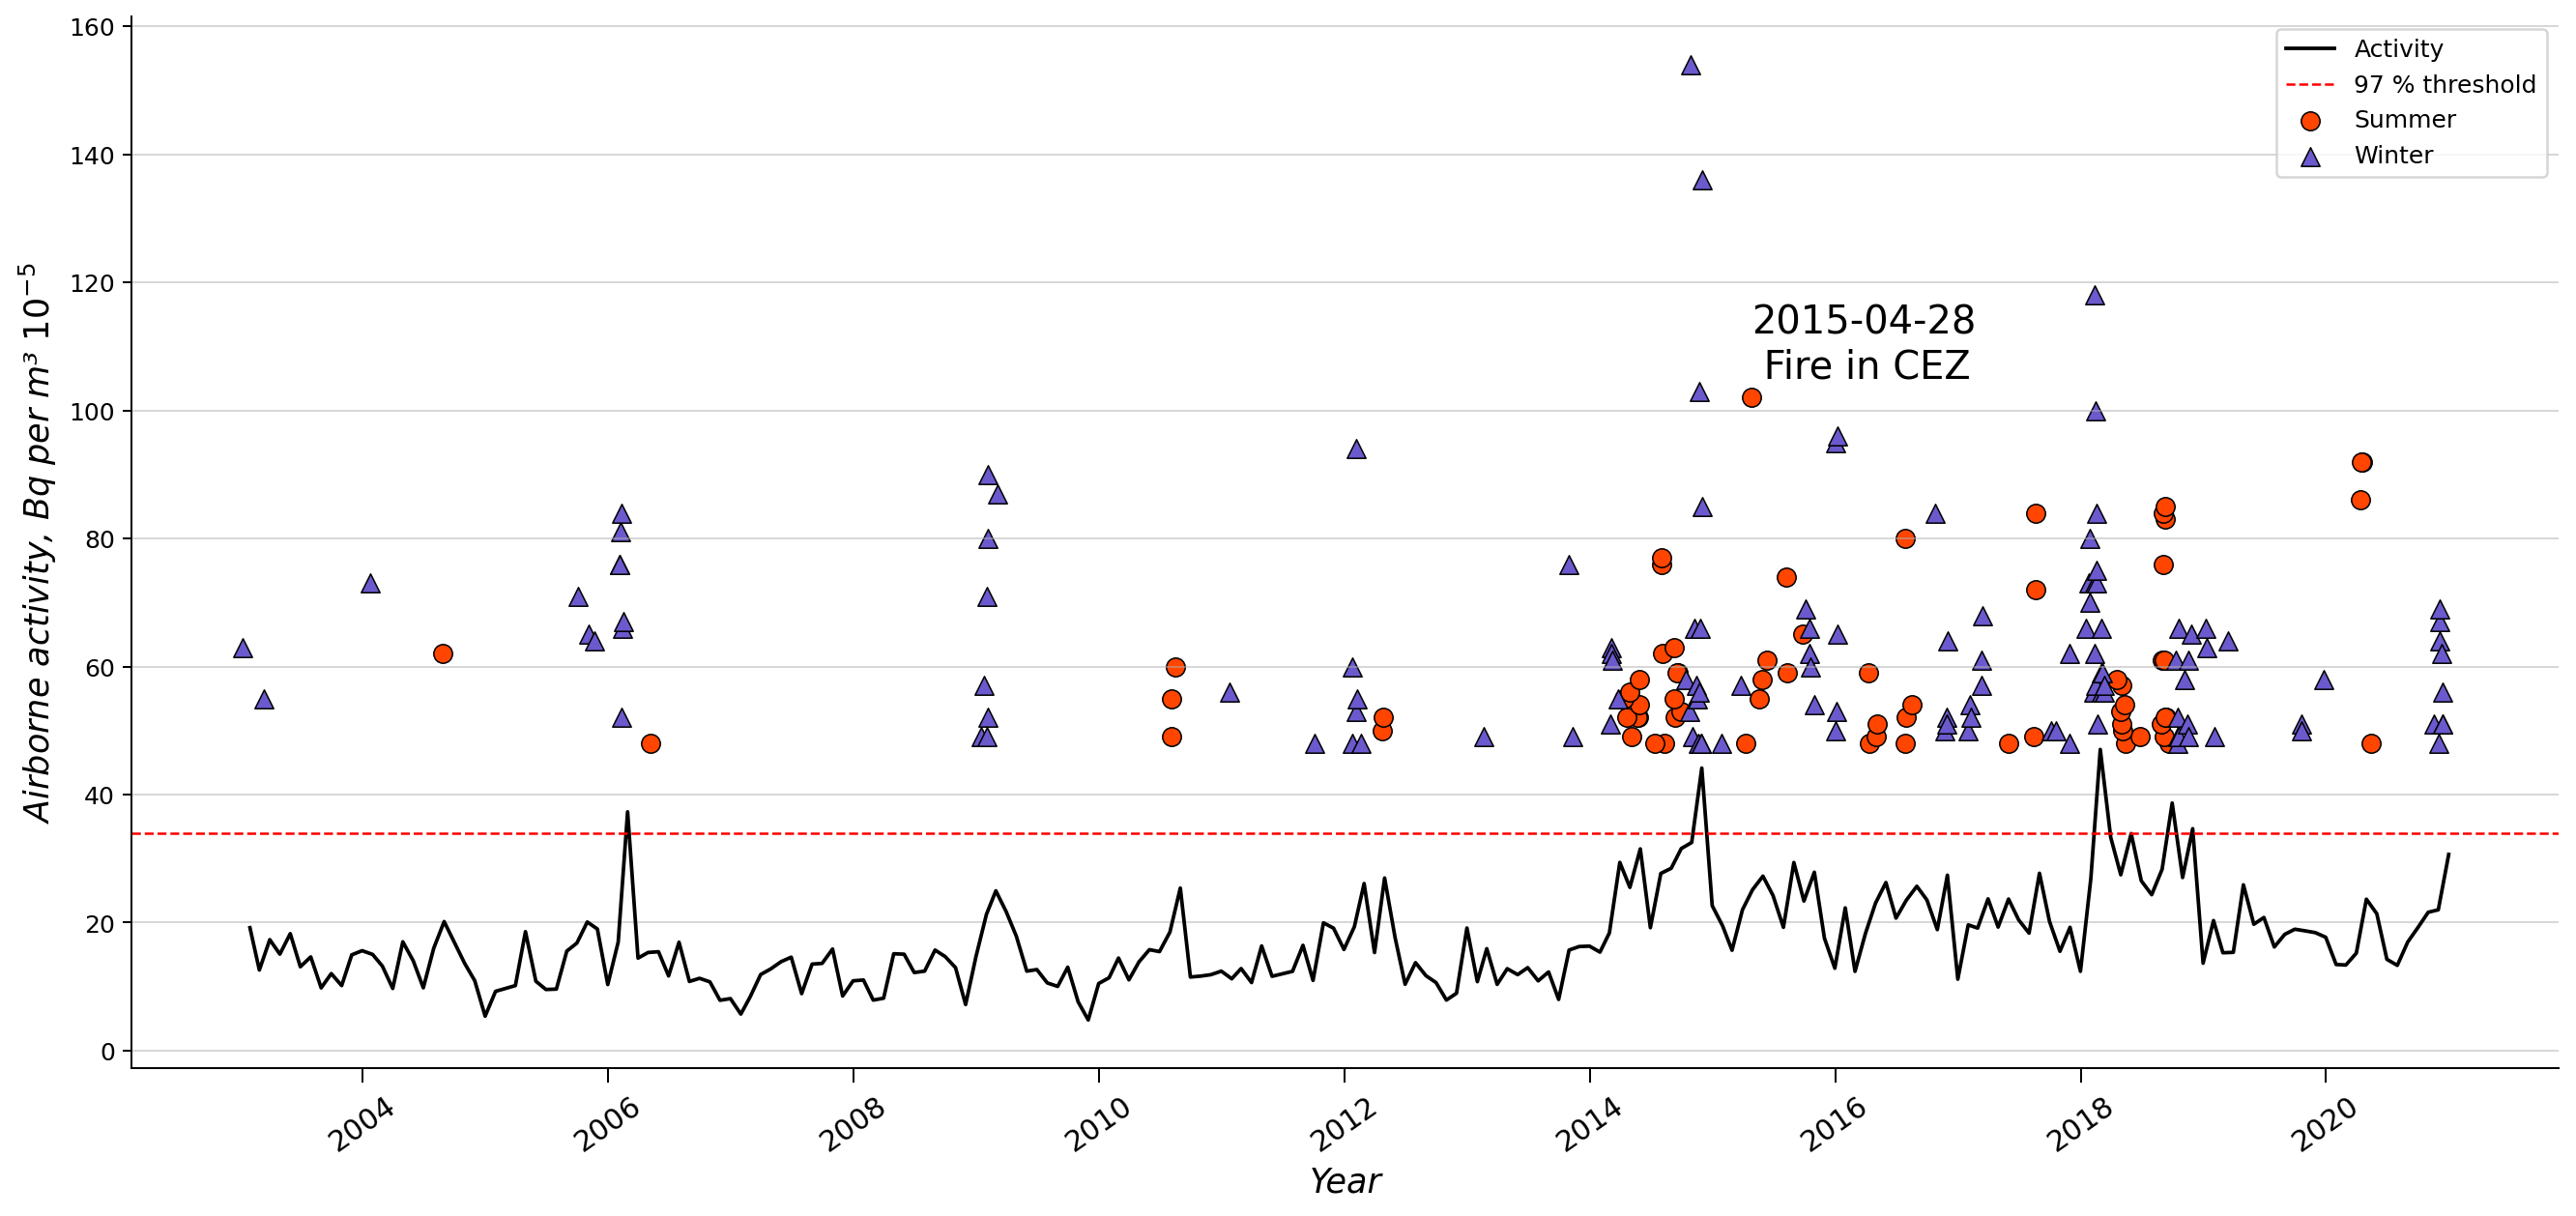

In [261]:
x = 'Date'
y = 'Conc'
s = chr(0x00b3)
s1 = ' $10^{-5}$'
cmap = 'seismic'
fig, ax = plt.subplots(figsize = (18,8), dpi = 180)
sns.lineplot(x, y, data= df1, color = 'black').axhline(33.9, linewidth = 1,
                                                       color = 'r',
                                                       linestyle = '--' )
sns.scatterplot(x, y, data=df_sum,
                s = 60,
                marker = 'o',
                fc = 'orangered',
                ec = 'black' )
sns.scatterplot(x, y, data=df_win,
                s = 60,
                marker = '^',
                fc = 'slateblue',
                ec = 'black' )
sns.despine(ax=ax, top=True, right=True)
ax.tick_params(axis = 'x', 
                direction='out',
                labelsize = 12,
                length = 6,
                rotation = 35)
ax.set_ylabel('Airborne activity, Bq per m'+s + s1,
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax.set_xlabel('Year',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax.legend(labels=["Activity","97 % threshold", "Summer", "Winter"], fontsize = 'medium', loc = 1)
ax.grid(axis='y', alpha = 0.5)
date = df_sum.Date[df_sum.index[68]].strftime('%Y-%m-%d')
plt.text(df_sum.Date[df_sum.index[68]], df_sum.Conc[df_sum.index[68]]+3, str(date) +'\n Fire in CEZ', fontdict=dict(color='black', size=16))
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig6.png', dpi=180) 

In [ ]:
#example of datafraem indexing 
mi_fin['index'] = range(1, len(mi_fin)+1)
mi_fin

,Conc,Year,Mon,index
0,19.200000,2003,Jan,1
1,12.592593,2003,Feb,2
2,17.333333,2003,Mar,3
3,15.071429,2003,Apr,4
4,18.275862,2003,May,5
...,...,...,...,...
7,16.967742,2020,Aug,209
8,19.200000,2020,Sep,210
9,21.612903,2020,Oct,211
10,22.000000,2020,Nov,212


In [75]:
#example of rank precentile calculation
df1['Rank'] = df1.Conc.rank()
df1['Rank_Pct'] = df1.Conc.rank(pct=True)
df1.sort_values('Conc').tail(30)


,Date,Conc,Week,Year,Mon,season,Rank,Rank_Pct
132,2014-04-30,25.500000,18,2014,Apr,sum,184.0,0.863850
160,2016-08-31,25.677419,35,2016,Aug,sum,185.0,0.868545
192,2019-04-30,25.900000,18,2019,Apr,sum,186.0,0.873239
106,2012-02-29,26.103448,9,2012,Feb,win,187.0,0.877934
157,2016-05-31,26.258065,22,2016,May,sum,188.0,0.882629
182,2018-06-30,26.533333,26,2018,Jun,sum,189.0,0.887324
177,2018-01-31,26.935484,5,2018,Jan,win,190.0,0.892019
108,2012-04-30,26.966667,18,2012,Apr,sum,191.0,0.896714
186,2018-10-31,27.032258,44,2018,Oct,win,192.0,0.901408
145,2015-05-31,27.258065,22,2015,May,sum,193.0,0.906103
